## **Modelo de Clustering - Adopción digital**

### **Objetivo**
El propósito de este modelo es clasificar los departamentos de Colombia a partir de la información relacionada con las condiciones de la conectividad a internet de los hogares, las habilidades digitales de su población y sus hábitos del uso de internet con fines educativos.

### **Diccionario de las variables empleadas**
Las variables empleadas en este modelo son:

* **1_Educación_y_Aprendizaje_2023**: Adopción digtal para la educación y aprendizaje
* **1_IBD_Habilidades_digitales**: Índice de brecha digital
* **1_avg_d_kbps**: Velocidad de descarga promedio por departamento (calidad de conectividad a internet).
* **1_avg_u_kbps**: Velocidad de carga promedio por departamento (calidad de conectividad a internet).
* **1_avg_lat_ms**: Latencia promedio por departamento (calidad de conectividad a internet).
* **1_Relevancia_UX**: Relevancia de la experiencia de usuario
* **2_Proporcion_cumplimiento_Sena**: Proporción de personas inscritas sobre la meta de personas inscritas en el SENA.
* **2_Hogares_servicio_Internet_fijo**: Proporción de la población que paga por servicio de internet en sus hogares

### **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

### **Carga datos**

In [3]:
df = pd.read_excel('departamentos_cluster.xlsx')
df

,Unnamed: 0,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo
0,Amazonas,0.432,0.726,2141.176471,2580.235294,294.294118,3871,1.186100,90.7
1,Antioquia,0.284,0.526,15795.107621,9992.868090,59.000838,89957,0.977400,93.9
2,Arauca,0.353,0.710,11577.504673,9562.448598,62.831776,1720,1.000000,90.0
3,Atlántico,0.328,0.524,20190.463519,13073.188841,41.000000,12517,1.000000,94.6
4,Bogotá,0.342,0.276,18918.195753,13253.056325,33.275162,111944,0.970100,94.0
5,Bolivar,0.332,0.615,15123.140728,10539.097682,53.973510,44401,0.998100,95.0
6,Boyacá,0.342,0.539,14745.472570,9455.669875,55.582291,21749,1.000000,88.6
7,Caldas,0.267,0.542,14749.234091,10007.829545,57.240909,20050,0.896200,92.9
8,Caquetá,0.298,0.679,8982.677966,9917.277542,144.048729,22787,0.739600,70.8
9,Casanare,0.268,0.631,11003.000000,8289.937853,51.355932,790,0.068600,86.7


Preparamos la base para el modelo eliminando la columna que contiene el nombre del departamento

In [ ]:
X = df.drop(columns=['Depto'], axis=1)
X.head()

,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo
0,0.432,0.726,2141.176471,2580.235294,294.294118,3871,1.1861,90.7
1,0.284,0.526,15795.107621,9992.868090,59.000838,89957,0.9774,93.9
2,0.353,0.710,11577.504673,9562.448598,62.831776,1720,1.0000,90.0
3,0.328,0.524,20190.463519,13073.188841,41.000000,12517,1.0000,94.6
4,0.342,0.276,18918.195753,13253.056325,33.275162,111944,0.9701,94.0


### **Analisis de correlación**

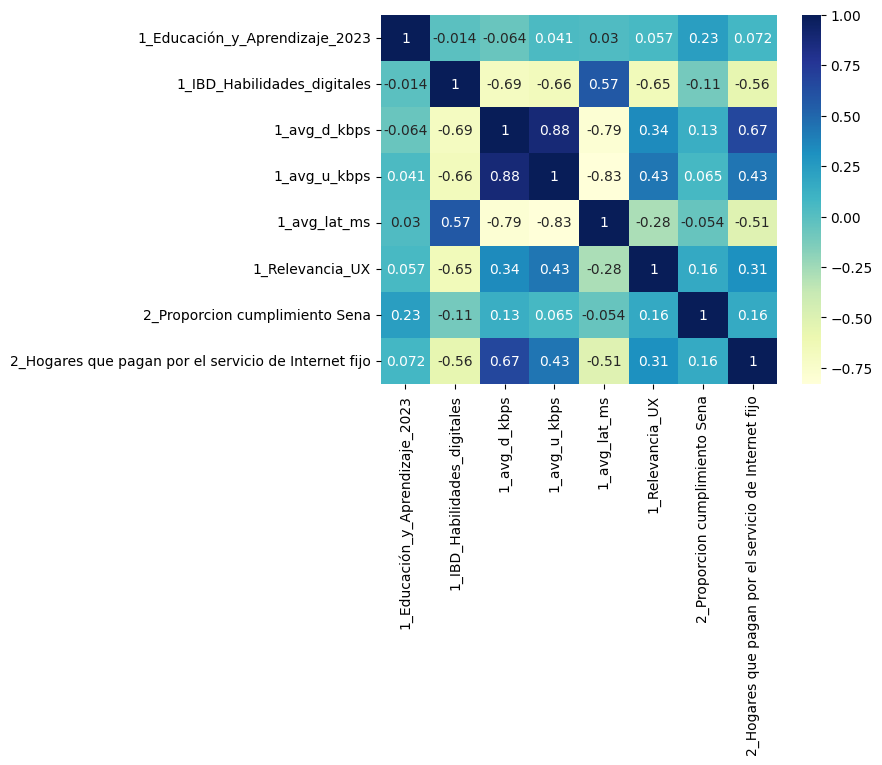

In [ ]:

import seaborn as sns
co_mtx = X.corr()
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

Eliminamos la columna `1_avg_u_kbps` ya que presenta una alta correlación con la variable `1_avg_d_kbps`

In [ ]:
#Eliminar correlación
X = X.drop(columns=['1_avg_u_kbps'], axis = 1)
X.head()

,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo
0,0.432,0.726,2141.176471,294.294118,3871,1.1861,90.7
1,0.284,0.526,15795.107621,59.000838,89957,0.9774,93.9
2,0.353,0.710,11577.504673,62.831776,1720,1.0000,90.0
3,0.328,0.524,20190.463519,41.000000,12517,1.0000,94.6
4,0.342,0.276,18918.195753,33.275162,111944,0.9701,94.0


Estandarización de los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means

como primer opción, se desarrolla un modelo de Kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Se establece el número ideal de clusters

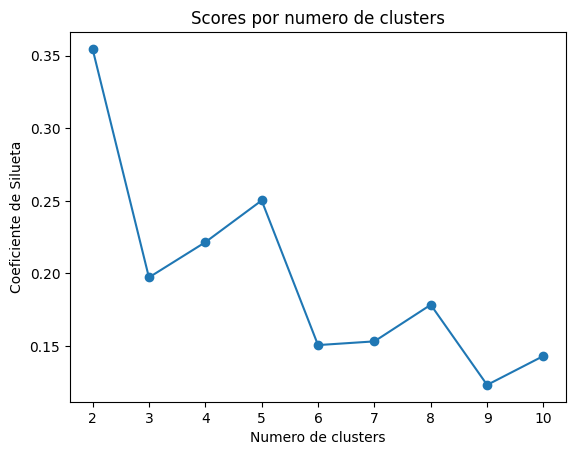

In [ ]:
#
scores = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  sil = silhouette_score(X_scaled, kmeans.labels_)
  scores.append(sil)

plt.plot(range(2,11), scores, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Scores por numero de clusters')
plt.show()

Obtenemos que el modelo con 2 clusters obtiene el mayor coef. de silueta

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
silhouette_score(X_scaled, kmeans.fit_predict(X_scaled))

np.float64(0.14218779642388232)

**Cluster 1**

In [ ]:
Cluster_0 = df[kmeans.labels_==0]
Cluster_0

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo
0,Amazonas,0.432,0.726,2141.176471,2580.235294,294.294118,3871,1.186100,90.7
8,Caquetá,0.298,0.679,8982.677966,9917.277542,144.048729,22787,0.739600,70.8
12,Chocó,0.331,0.719,10154.557692,7811.852564,134.102564,2938,1.239200,77.7
15,Guainía,0.347,0.753,5840.583333,6340.250000,311.250000,20778,0.950242,62.6
16,Guaviare,0.260,0.678,10399.000000,5880.617021,238.829787,3284,1.004200,83.3
23,Putumayo,0.299,0.694,8645.080508,9073.436441,83.055085,12549,0.850200,73.0
31,Vaupes,0.297,0.779,1297.000000,1785.846154,618.461538,528,0.793400,78.4
32,Vichada,0.157,0.868,4224.952381,4933.571429,240.285714,1515,0.846200,78.2


**Cluster 2**

In [ ]:
Cluster_1 = df[kmeans.labels_==1]
Cluster_1

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo
1,Antioquia,0.284,0.526,15795.107621,9992.868090,59.000838,89957,0.977400,93.9
2,Arauca,0.353,0.710,11577.504673,9562.448598,62.831776,1720,1.000000,90.0
3,Atlántico,0.328,0.524,20190.463519,13073.188841,41.000000,12517,1.000000,94.6
4,Bogotá,0.342,0.276,18918.195753,13253.056325,33.275162,111944,0.970100,94.0
5,Bolivar,0.332,0.615,15123.140728,10539.097682,53.973510,44401,0.998100,95.0
6,Boyacá,0.342,0.539,14745.472570,9455.669875,55.582291,21749,1.000000,88.6
7,Caldas,0.267,0.542,14749.234091,10007.829545,57.240909,20050,0.896200,92.9
9,Casanare,0.268,0.631,11003.000000,8289.937853,51.355932,790,0.068600,86.7
10,Cauca,0.306,0.659,11359.091097,8164.964803,78.378882,9794,0.957200,83.2
11,Cesar,0.381,0.627,17840.097130,10015.317881,57.426049,2429,1.000000,91.7


# **Gridsearch**

Como segunda opción desarrolla un modelo de clasificación Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

Se estiman los parámetros optimos para este modelo

In [ ]:
#Parametros
param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

In [ ]:
# Mejores parametros
kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
14580 fits failed out of a total of 21870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3738 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 864, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

GridSearchCV(cv=5, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300],
                         'n_clusters': range(2, 11), 'n_init': [5, 10, 15],
                         'random_state': [0, 42, 100],
                         'tol': [0.0001, 0.001, 0.01]})

In [ ]:
print("Mejores hiperparametros: ", grid_search.best_params_)
print('Número óptimo de clusters: ' + str(grid_search.best_params_['n_clusters']))

Mejores hiperparametros:  {'algorithm': 'elkan', 'init': 'random', 'max_iter': 100, 'n_clusters': 9, 'n_init': 5, 'random_state': 100, 'tol': 0.0001}
Número óptimo de clusters: 9


Se contruye el modelo con los parámetros óptimos

In [ ]:
#Modelo óptimo
mod_opt = KMeans(n_clusters = 9,
                init=grid_search.best_params_['init'],
                max_iter=grid_search.best_params_['max_iter'],
                tol=grid_search.best_params_['tol'],
                algorithm=grid_search.best_params_['algorithm'],
                random_state=42
                )

mod_opt.fit(X_scaled)
labels_opt = mod_opt.labels_
centroids_opt = mod_opt.cluster_centers_

In [ ]:
silhouette_score(X_scaled, mod_opt.labels_)

np.float64(0.16106738583701202)

In [ ]:
#Clusters
df_new = df.copy()
df_new['Cluster'] = mod_opt.labels_
df_new.head()

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
0,Amazonas,0.432,0.726,2141.176471,2580.235294,294.294118,3871,1.1861,90.7,2
1,Antioquia,0.284,0.526,15795.107621,9992.868090,59.000838,89957,0.9774,93.9,8
2,Arauca,0.353,0.710,11577.504673,9562.448598,62.831776,1720,1.0000,90.0,5
3,Atlántico,0.328,0.524,20190.463519,13073.188841,41.000000,12517,1.0000,94.6,5
4,Bogotá,0.342,0.276,18918.195753,13253.056325,33.275162,111944,0.9701,94.0,0


In [ ]:
df_new.to_csv('datos.csv')

In [ ]:
df_ = df_new.copy()
df_ = df_.drop(columns=['Depto'], axis=1)
df_agrupado = df_.groupby(['Cluster']).mean()
df_agrupado

,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo
Cluster,,,,,,,,
0,0.3420,0.276000,18918.195753,13253.056325,33.275162,111944.000000,0.970100,94.000000
1,0.2680,0.631000,11003.000000,8289.937853,51.355932,790.000000,0.068600,86.700000
2,0.3815,0.722500,6147.867081,5196.043929,214.198341,3404.500000,1.212650,84.200000
3,0.3220,0.766000,3568.791667,4063.048077,464.855769,10653.000000,0.871821,70.500000
4,0.2360,0.571833,15360.604984,9480.766919,58.525352,10846.166667,0.957183,88.350000
5,0.3560,0.627444,15255.899175,10070.228725,61.347623,12317.222222,0.969160,90.466667
6,0.2640,0.715600,8722.160391,7593.973447,156.919639,9985.800000,0.879480,77.700000
7,0.2900,0.585500,15417.197022,9960.093831,54.436099,38167.000000,1.051667,91.833333
8,0.2840,0.526000,15795.107621,9992.868090,59.000838,89957.000000,0.977400,93.900000


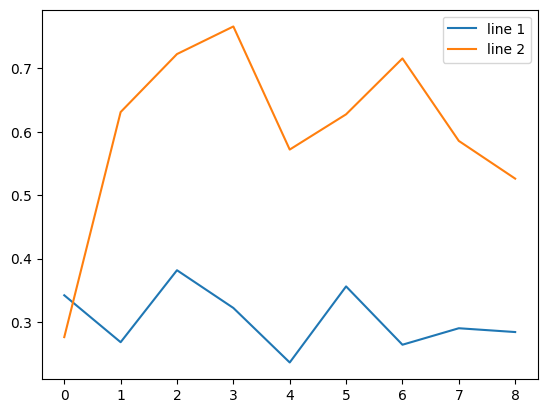

In [ ]:
plt.plot(df_agrupado.index, df_agrupado['1_Educación_y_Aprendizaje_2023'], label = "line 1")
plt.plot(df_agrupado.index, df_agrupado['1_IBD_Habilidades_digitales'], label = "line 2")
plt.legend()
plt.show()

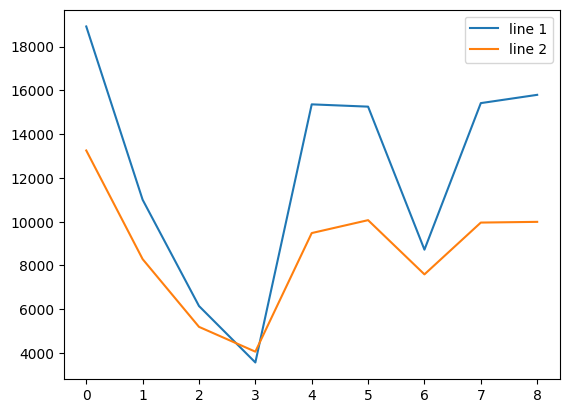

In [ ]:
plt.plot(df_agrupado.index, df_agrupado['1_avg_d_kbps'], label = "line 1")
plt.plot(df_agrupado.index, df_agrupado['1_avg_u_kbps'], label = "line 2")
plt.legend()
plt.show()

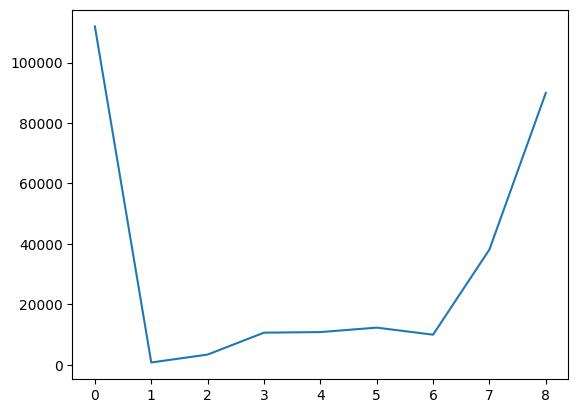

In [ ]:
plt.plot(df_agrupado.index, df_agrupado['1_Relevancia_UX'], label = "line 1")

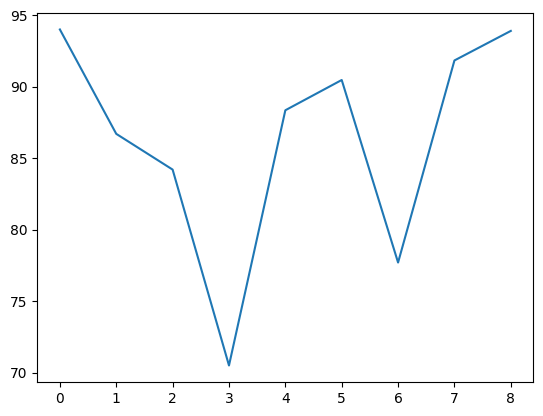

In [ ]:
plt.plot(df_agrupado.index, df_agrupado['2_Hogares que pagan por el servicio de Internet fijo'], label = "line 1")

## **Análisis de los Clusters obtenidos**

### **Cluster 1**

In [ ]:
C1 = df_new[df_new['Cluster'] == 0]
C1

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
4,Bogotá,0.342,0.276,18918.195753,13253.056325,33.275162,111944,0.9701,94.0,0


*   Nivel más bajo de habilidades digitales
*   Altos niveles de conectividad
*   Alto nivel de UX (ejecucion/meta)
*   Nivel más alto de pago por servicio de internet

Descripción: Si bien cuenta con un nivel de infraestructura sobresaliente, y altos niveles de interés por la ed.virtual; no logra reflejarlos en verdaderos resultados en terminos de formación en habilidades digitales.



### **Cluster 2**

In [ ]:
C2 = df_new[df_new['Cluster'] == 1]
C2

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
9,Casanare,0.268,0.631,11003.0,8289.937853,51.355932,790,0.0686,86.7,1


*   Alto nivel de habilidades digitales
*   Niveles de conectividad bajos
*   Nivel minimo de UX (ejecucion/meta)
*   Alto nivel de pago por servicio de internet

Descripción: La infraestructura no es óptima para la capacitación, lo que puede generar bajo interés en la formación virtual a pesar de que los hogares dan importancia al servicio de internet dentro de sus canastas basicas y de que existe una población altamente desarrollada en habilidades tecnologicas.

### **Cluster 3**

In [ ]:
C3 = df_new[df_new['Cluster'] == 2]
C3

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
0,Amazonas,0.432,0.726,2141.176471,2580.235294,294.294118,3871,1.1861,90.7,2
12,Chocó,0.331,0.719,10154.557692,7811.852564,134.102564,2938,1.2392,77.7,2


*   Alto nivel de habilidades digitales
*   Niveles de conectividad bajos
*   Bajo nivel de UX (ejecucion/meta)
*   Nivel medio de pago por servicio de internet

Descripción: De nuevo la infraestructura parece desanimar a la población para formarse virtualmente, además el acceso a servicios de internet pagos parece restringido para ciertos hogares (poder adquisitivo medio-bajo).

### **Cluster 4**

In [ ]:
C4 = df_new[df_new['Cluster'] == 3]
C4

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
15,Guainía,0.347,0.753,5840.583333,6340.250000,311.250000,20778,0.950242,62.6,3
31,Vaupes,0.297,0.779,1297.000000,1785.846154,618.461538,528,0.793400,78.4,3


*   Mayor indice de habilidades digitales
*   Peores niveles de conectividad
*   Bajo nivel de UX (ejecucion/meta)
*   Nivel mas bajo de pago por servicio de internet

Descripción: Concentra las peores condiciones para el desarrollo de la educación virtual mala infraestructura, bajo acceso a servicios de internet y poco interés; sin embargo la población muestra altos niveles de conocimiento en herramientas digitales

### **Cluster 5**

In [ ]:
C5 = df_new[df_new['Cluster'] == 4]
C5

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
7,Caldas,0.267,0.542,14749.234091,10007.829545,57.240909,20050,0.8962,92.9,4
17,Huila,0.240,0.606,13443.081188,7748.871287,59.057426,2692,0.9612,84.9,4
20,Meta,0.266,0.555,14195.779762,9235.434524,45.465774,6218,1.0253,84.9,4
22,Norte de Santander,0.274,0.584,14894.927619,10120.426667,65.969524,13652,1.0000,83.5,4
25,Risaralda,0.204,0.509,14555.023913,10102.747826,54.043478,22040,1.0000,87.4,4
26,San Andrés,0.165,0.635,20325.583333,9669.291667,69.375000,425,0.8604,96.5,4


*   Nivel promedio de habilidades digitales
*   Niveles de conectividad medio-altos
*   Bajo nivel de UX (ejecucion/meta)
*   Nivel alto de pago por servicio de internet

Descripción: Ofrece condiciones favorables para el desarrollo de la educación virtual (buena infraestructura, población capaz de manejar tecnologias, acceso a servicio pagos de internet); sin embargo no parece existir una cultura interesada en la formación virtual.

## **Cluster 6**

In [ ]:
C6 = df_new[df_new['Cluster'] == 5]
C6

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
2,Arauca,0.353,0.710,11577.504673,9562.448598,62.831776,1720,1.000000,90.0,5
3,Atlántico,0.328,0.524,20190.463519,13073.188841,41.000000,12517,1.000000,94.6,5
6,Boyacá,0.342,0.539,14745.472570,9455.669875,55.582291,21749,1.000000,88.6,5
11,Cesar,0.381,0.627,17840.097130,10015.317881,57.426049,2429,1.000000,91.7,5
13,Córdoba,0.320,0.675,15263.245228,9300.508076,71.788546,20778,0.950242,92.1,5
18,La Guajira,0.397,0.707,12647.671280,9528.138408,56.408304,29199,0.936500,88.8,5
21,Nariño,0.312,0.665,14716.102913,10017.541748,70.718447,9499,0.951400,86.9,5
27,Santander,0.379,0.527,13481.250781,8962.064062,70.700781,7566,1.000000,92.9,5
28,Sucre,0.392,0.673,16841.284483,10717.181034,65.672414,5398,0.884300,88.6,5


*   Nivel promedio de habilidades digitales
*   Niveles de conectividad medio-altos
*   Bajo nivel de UX (ejecucion/meta)
*   Nivel alto de pago por servicio de internet

Descripción: Ofrece condiciones favorables para el desarrollo de la educación virtual (buena infraestructura, población capaz de manejar tecnologias, acceso a servicio pagos de internet); y tiene una población más abierta y dispuesta a darle una oportunidad a la formación virtual.

### **Cluster 7**

In [ ]:
C7 = df_new[df_new['Cluster'] == 6]
C7

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
8,Caquetá,0.298,0.679,8982.677966,9917.277542,144.048729,22787,0.7396,70.8,6
10,Cauca,0.306,0.659,11359.091097,8164.964803,78.378882,9794,0.9572,83.2,6
16,Guaviare,0.260,0.678,10399.000000,5880.617021,238.829787,3284,1.0042,83.3,6
23,Putumayo,0.299,0.694,8645.080508,9073.436441,83.055085,12549,0.8502,73.0,6
32,Vichada,0.157,0.868,4224.952381,4933.571429,240.285714,1515,0.8462,78.2,6


*   Nivel alto de habilidades digitales
*   Niveles de conectividad medio-bajos
*   Bajo nivel de UX (ejecucion/meta)
*   Nivel medio-bajo de pago por servicio de internet

Descripción: Se observa un estado poco desarrollado de la infraestructura, lo que puede reducir y encarecer el acceso a internet para la población, minimizando el interés en la formación virtual a pesar de contar con población habil en tecnología.

### **Cluster 8**

In [ ]:
C8 = df_new[df_new['Cluster'] == 7]
C8

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
5,Bolivar,0.332,0.615,15123.140728,10539.097682,53.973510,44401,0.9981,95.0,7
14,Cundinamarca,0.268,0.576,12623.110709,8687.938406,47.902174,47773,1.1351,91.2,7
19,Magdalena,0.291,0.648,17191.815514,11867.046122,64.276730,25489,1.1645,88.8,7
24,Quindio,0.291,0.530,15297.280899,8991.359551,61.904494,40185,0.9989,95.1,7
29,Tolima,0.268,0.585,15034.689713,8979.295110,48.086003,46953,1.0134,90.0,7
30,Valle del Cauca,0.290,0.559,17233.144570,10695.826116,50.473684,24201,1.0000,90.9,7


*   Nivel promedio de habilidades digitales
*   Niveles de conectividad medio-altos
*   Nivel elevado de UX (ejecucion/meta)
*   Nivel alto de pago por servicio de internet

Descripción: Muestra un contexto relativamente desarrollado de formación virtual (buena infraestructura, población habil, alto interes en educación virtual y acceso óptimo a servicios de internet); punto focal para la profundización y mejoría de recursos.

### **Cluster 9**


In [ ]:
C9 = df_new[df_new['Cluster'] == 8]
C9

,Depto,1_Educación_y_Aprendizaje_2023,1_IBD_Habilidades_digitales,1_avg_d_kbps,1_avg_u_kbps,1_avg_lat_ms,1_Relevancia_UX,2_Proporcion cumplimiento Sena,2_Hogares que pagan por el servicio de Internet fijo,Cluster
1,Antioquia,0.284,0.526,15795.107621,9992.86809,59.000838,89957,0.9774,93.9,8


*   Nivel promedio de habilidades digitales
*   Niveles de conectividad medio-altos
*   Nivel alto de UX (ejecucion/meta)
*   Nivel más alto de pago por servicio de internet

Descripción: Mejor infraestructura disponible en el país, un nivel de interés en la formación virtual elevado y población sumamente habil para el manejo de tecnología, puede ser el centro de formación virtual del país.

# **DBSCAN**

In [ ]:
pip install kneed

In [ ]:
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

In [ ]:
#Eleccion parametros - eps
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X_scaled)
distancias, indices = nbrs.kneighbors(X_scaled)
distancias = np.sort(distancias.flatten())

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

2.350786005895946


In [ ]:
dbscan = DBSCAN(eps = 2.35, min_samples = 14).fit(X_scaled)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Numero de clusters: "+str(n_clusters))

Numero de clusters: 1


**Resultado**:
DBSCAN no ofrece una clasificación aceptable para los datos disponibles

# **Clasificación con 3 indicadores principales (Habilidades digitales, Infraestructura (Conectividad), Experiencia usuario (Interes)**

Como cuarta propuesta, se desarrolló un modelo de Kmeans teniendo en cuenta únicamente tres de las variables seleccionadas por criterio de experto:


*   1_IBD_Habilidades_digitales
*   1_avg_lat_ms
*   1_Relevancia_UX



In [ ]:
datos = df[['Depto', '1_IBD_Habilidades_digitales', '1_avg_lat_ms',  '1_Relevancia_UX']]
datos.head()

,Depto,1_IBD_Habilidades_digitales,1_avg_lat_ms,1_Relevancia_UX
0,Amazonas,0.726,294.294118,3871
1,Antioquia,0.526,59.000838,89957
2,Arauca,0.710,62.831776,1720
3,Atlántico,0.524,41.000000,12517
4,Bogotá,0.276,33.275162,111944


Limpieza y estandarización de los datos

In [ ]:
X_datos = datos.copy()
X_datos = X_datos.drop(columns=['Depto'], axis = 1)

#Estandarización de los datos
scaler = StandardScaler()
X_scaled_datos = scaler.fit_transform(X_datos)


In [ ]:
# Identificar los mejores parametros
kmeans_datos = KMeans(random_state=42)
grid_search_datos = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search_datos.fit(X_scaled_datos)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
14580 fits failed out of a total of 21870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3543 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 864, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

GridSearchCV(cv=5, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300],
                         'n_clusters': range(2, 11), 'n_init': [5, 10, 15],
                         'random_state': [0, 42, 100],
                         'tol': [0.0001, 0.001, 0.01]})

In [ ]:
print("Mejores hiperparametros: ", grid_search_datos.best_params_)
print('Número óptimo de clusters: ' + str(grid_search_datos.best_params_['n_clusters']))

Mejores hiperparametros:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 10, 'n_init': 15, 'random_state': 42, 'tol': 0.0001}
Número óptimo de clusters: 10


In [ ]:
#Constución del modelo óptimo con los hiperparámetos identificados
mod_opt_datos = KMeans(n_clusters = 10,
                init=grid_search_datos.best_params_['init'],
                max_iter=grid_search_datos.best_params_['max_iter'],
                tol=grid_search_datos.best_params_['tol'],
                algorithm=grid_search_datos.best_params_['algorithm'],
                random_state=42
                )

mod_opt_datos.fit(X_scaled_datos)
labels_opt_datos = mod_opt_datos.labels_
centroids_opt_datos = mod_opt_datos.cluster_centers_

In [ ]:
silhouette_score(X_scaled_datos, mod_opt_datos.labels_)

np.float64(0.34266800867990144)

In [ ]:
#Clusters
datos_new = datos.copy()
datos_new['Cluster'] = mod_opt_datos.labels_
datos_new.head()

,Depto,1_IBD_Habilidades_digitales,1_avg_lat_ms,1_Relevancia_UX,Cluster
0,Amazonas,0.726,294.294118,3871,6
1,Antioquia,0.526,59.000838,89957,2
2,Arauca,0.710,62.831776,1720,5
3,Atlántico,0.524,41.000000,12517,1
4,Bogotá,0.276,33.275162,111944,4


In [ ]:
datos_ = datos_new.copy()
datos_ = datos_.drop(columns=['Depto'], axis=1)
datos_agrupado = datos_.groupby(['Cluster']).mean()
datos_agrupado

,1_IBD_Habilidades_digitales,1_avg_lat_ms,1_Relevancia_UX
Cluster,,,
0,0.698500,186.466176,3111.000000
1,0.542375,55.059555,15999.125000
2,0.526000,59.000838,89957.000000
3,0.779000,618.461538,528.000000
4,0.276000,33.275162,111944.000000
5,0.678889,77.464324,15245.888889
6,0.739500,302.772059,12324.500000
7,0.576500,52.966545,44828.000000
8,0.624750,59.303602,1584.000000


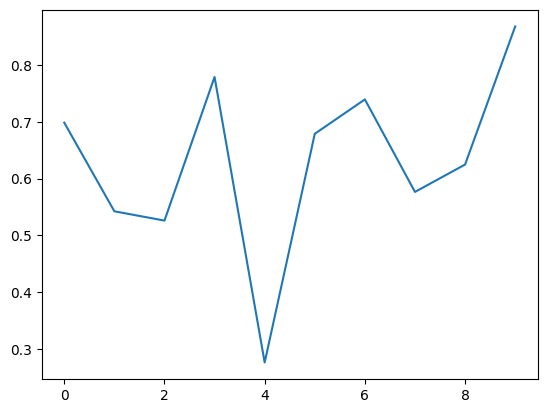

In [ ]:
plt.plot(datos_agrupado.index, datos_agrupado['1_IBD_Habilidades_digitales'], label = "line 1")

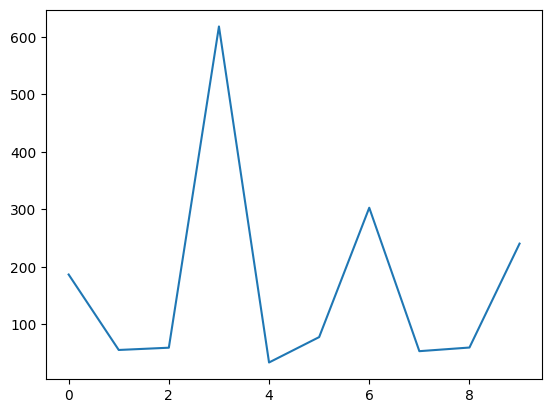

In [ ]:
plt.plot(datos_agrupado.index, datos_agrupado['1_avg_lat_ms'], label = "line 1")

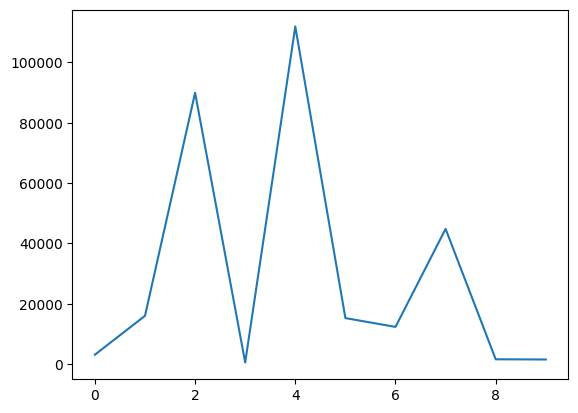

In [ ]:
plt.plot(datos_agrupado.index, datos_agrupado['1_Relevancia_UX'], label = "line 1")

Con menos variables explicativas se obtiene un cluster más (sin embargo no parece variar el análisis inicial). Mejor Silhouette score